In [1]:
from nli_13 import NLI_FullLinear_13M, NLI_PairsBasic_13M, NLI_Heads_13M, NLI_MiniHeads_13M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 13M

In [2]:
nli = NLI_FullLinear_13M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2348]      10,821,932
         LayerNorm-2                 [-1, 2348]           4,696
            Linear-3                 [-1, 1024]       2,405,376
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
            Linear-6                   [-1, 64]          32,832
            Linear-7                    [-1, 1]              65
Total params: 13,789,701
Trainable params: 13,789,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.06
Params size (MB): 52.60
Estimated Total Size (MB): 52.68
----------------------------------------------------------------


In [3]:
nli = NLI_PairsBasic_13M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 5, 1024]       1,573,888
            Linear-2               [-1, 5, 768]         787,200
           Dropout-3               [-1, 5, 768]               0
            Linear-4                 [-1, 2048]       7,866,368
         LayerNorm-5                 [-1, 2048]           4,096
            Linear-6                 [-1, 1024]       2,098,176
           Dropout-7                 [-1, 1024]               0
            Linear-8                  [-1, 512]         524,800
            Linear-9                  [-1, 256]         131,328
           Linear-10                   [-1, 64]          16,448
           Linear-11                    [-1, 1]              65
Total params: 13,002,369
Trainable params: 13,002,369
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Fo

In [4]:
nli = NLI_Heads_13M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 512]         786,944
            Linear-2               [-1, 5, 512]         786,944
            Linear-3               [-1, 5, 512]         786,944
            Linear-4               [-1, 5, 512]         786,944
            Linear-5                [-1, 5, 64]          32,832
            Linear-6                [-1, 5, 64]          32,832
            Linear-7               [-1, 5, 512]         786,944
            Linear-8                [-1, 5, 64]          32,832
            Linear-9                [-1, 5, 64]          32,832
           Linear-10               [-1, 5, 512]         786,944
             head-11                [-1, 5, 64]               0
             head-12                [-1, 5, 64]               0
           Linear-13               [-1, 5, 512]         786,944
             head-14                [-1

In [5]:
nli = NLI_MiniHeads_13M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 256]         393,472
            Linear-2               [-1, 5, 256]         393,472
            Linear-3               [-1, 5, 256]         393,472
            Linear-4               [-1, 5, 256]         393,472
            Linear-5               [-1, 5, 256]         393,472
            Linear-6               [-1, 5, 256]         393,472
            Linear-7               [-1, 5, 256]         393,472
            Linear-8               [-1, 5, 256]         393,472
            Linear-9               [-1, 5, 256]         393,472
           Linear-10               [-1, 5, 256]         393,472
           Linear-11               [-1, 5, 256]         393,472
           Linear-12               [-1, 5, 256]         393,472
           Linear-13               [-1, 5, 256]         393,472
           Linear-14               [-1,

In [4]:
from sklearn.metrics import accuracy_score
y_pred = [1, 1, 1, 0]
y_true = [0, 1, 1, 0]
accuracy_score(y_true, y_pred)

0.75

## 3M

In [6]:
from nli_3 import NLI_FullLinear_3M, NLI_PairsBasic_3M, NLI_Heads_3M, NLI_MiniHeads_3M
import torch
import torchsummary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
nli = NLI_FullLinear_3M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 768]       3,539,712
         LayerNorm-2                  [-1, 768]           1,536
            Linear-3                  [-1, 256]         196,864
           Dropout-4                  [-1, 256]               0
            Linear-5                   [-1, 64]          16,448
            Linear-6                    [-1, 1]              65
Total params: 3,754,625
Trainable params: 3,754,625
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 14.32
Estimated Total Size (MB): 14.36
----------------------------------------------------------------


In [8]:
nli = NLI_PairsBasic_3M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 768]       1,180,416
            Linear-2               [-1, 5, 396]         304,524
           Dropout-3               [-1, 5, 396]               0
            Linear-4                  [-1, 798]       1,580,838
         LayerNorm-5                  [-1, 798]           1,596
            Linear-6                  [-1, 512]         409,088
           Dropout-7                  [-1, 512]               0
            Linear-8                  [-1, 256]         131,328
            Linear-9                    [-1, 1]             257
Total params: 3,608,047
Trainable params: 3,608,047
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.08
Params size (MB): 13.76
Estimated Total Size (MB): 13.86
-------------------------------------

In [9]:
nli = NLI_Heads_3M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 512]         786,944
            Linear-2               [-1, 5, 512]         786,944
            Linear-3               [-1, 5, 512]         786,944
            Linear-4               [-1, 5, 512]         786,944
            Linear-5                [-1, 5, 64]          32,832
            Linear-6                [-1, 5, 64]          32,832
            Linear-7                [-1, 5, 64]          32,832
            Linear-8                [-1, 5, 64]          32,832
              head-9                [-1, 5, 64]               0
             head-10                [-1, 5, 64]               0
             head-11                [-1, 5, 64]               0
             head-12                [-1, 5, 64]               0
        LayerNorm-13                 [-1, 1280]           2,560
          Dropout-14                 [-

In [10]:
nli = NLI_MiniHeads_3M(device=device)
torchsummary.summary(nli, input_size=(6, 768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 5, 256]         393,472
            Linear-2                [-1, 5, 32]           8,224
         mini_head-3                [-1, 5, 32]               0
            Linear-4               [-1, 5, 256]         393,472
            Linear-5               [-1, 5, 256]         393,472
            Linear-6               [-1, 5, 256]         393,472
            Linear-7               [-1, 5, 256]         393,472
            Linear-8                [-1, 5, 32]           8,224
            Linear-9               [-1, 5, 256]         393,472
           Linear-10               [-1, 5, 256]         393,472
           Linear-11                [-1, 5, 32]           8,224
           Linear-12                [-1, 5, 32]           8,224
        mini_head-13                [-1, 5, 32]               0
        mini_head-14                [-1

## Results NLI

Epoch: 0
Batch: 1/1


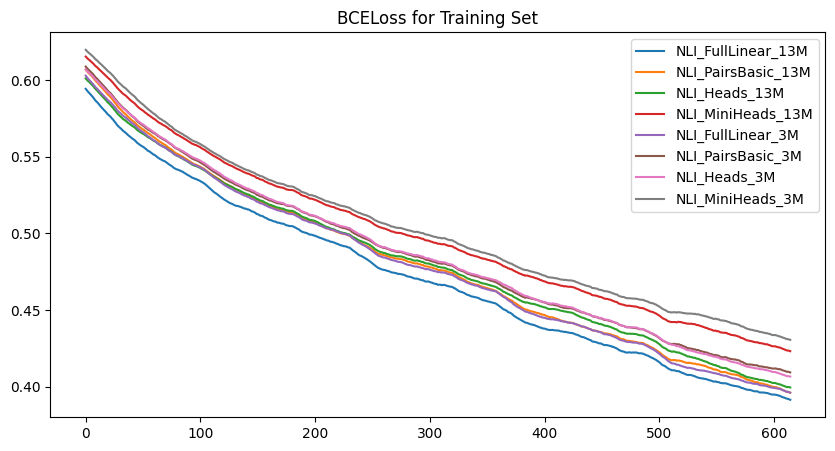

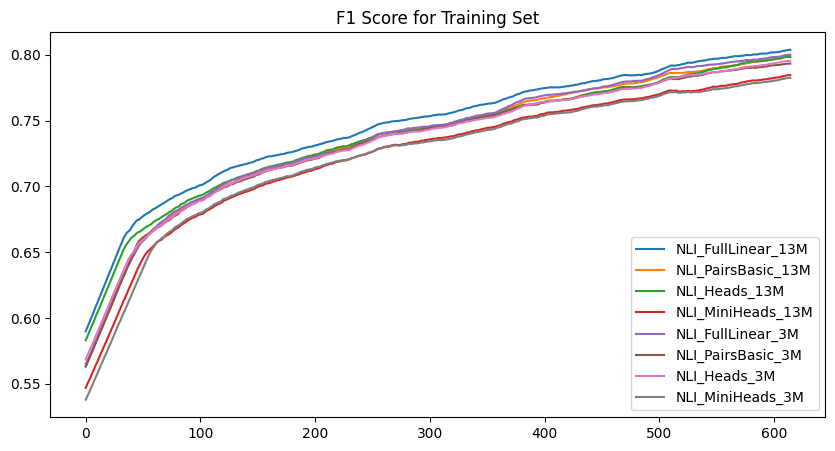

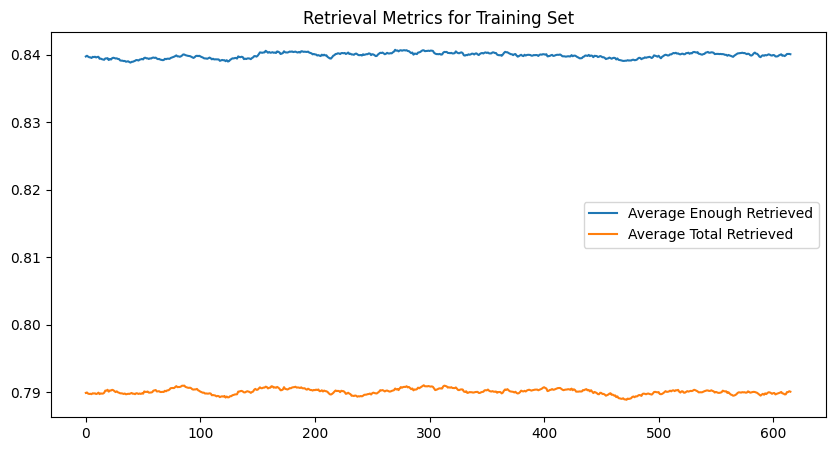

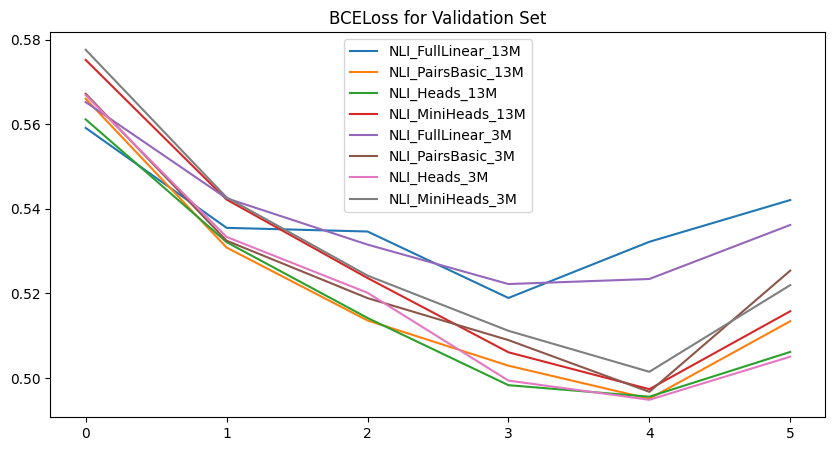

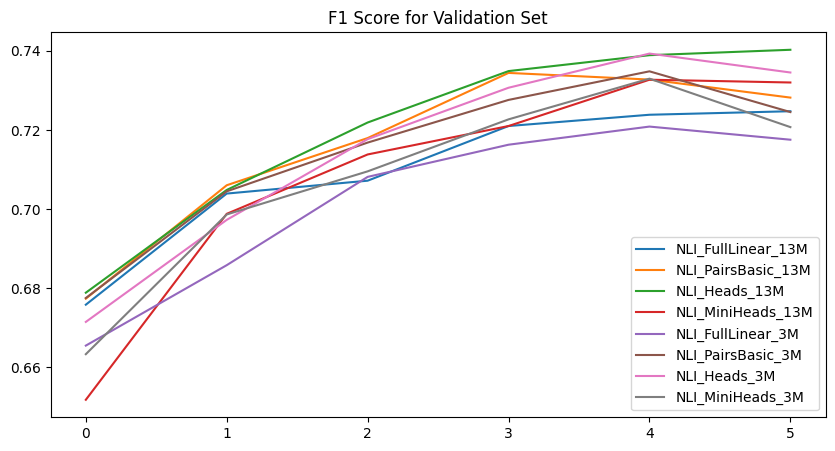

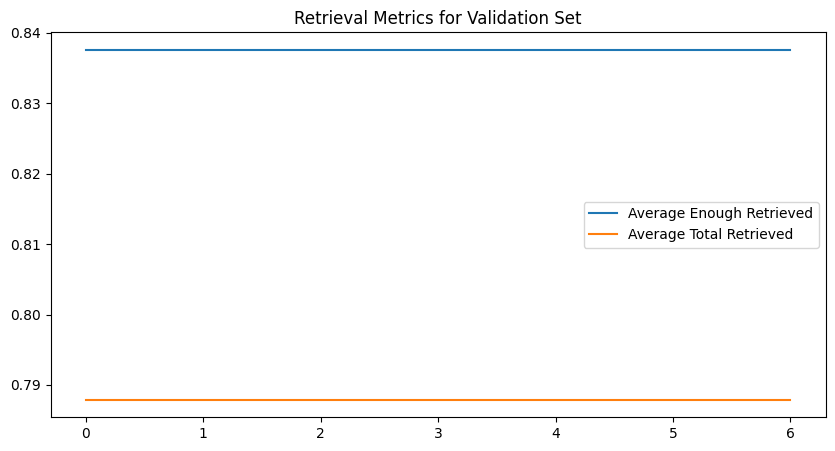

In [1]:
import json
from NLI_tests.other_utils import print_progress
# load tracking_train and tracking_eval from NLI_tests/results

with open("NLI_tests/results/tracking_train_v13_v3.json", "r") as f:
    tracking_train = json.load(f)

with open("NLI_tests/results/tracking_eval_v13_v3.json", "r") as f:
    tracking_eval = json.load(f)

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.2)

# Results Overall

Epoch: 0
Batch: 1/1


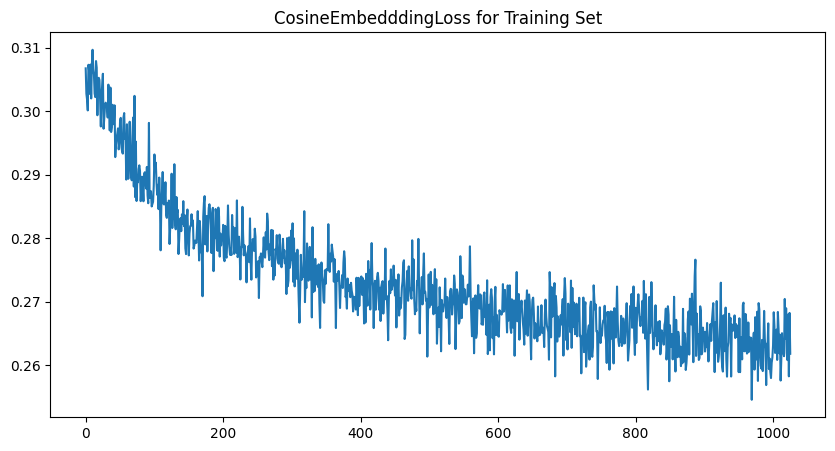

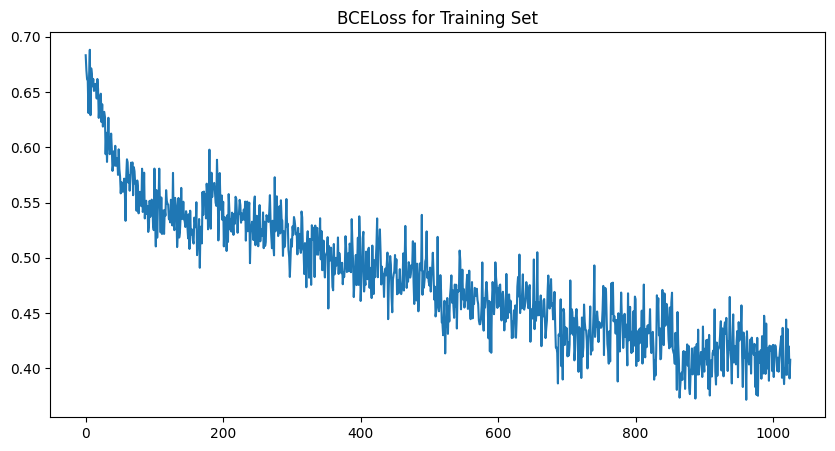

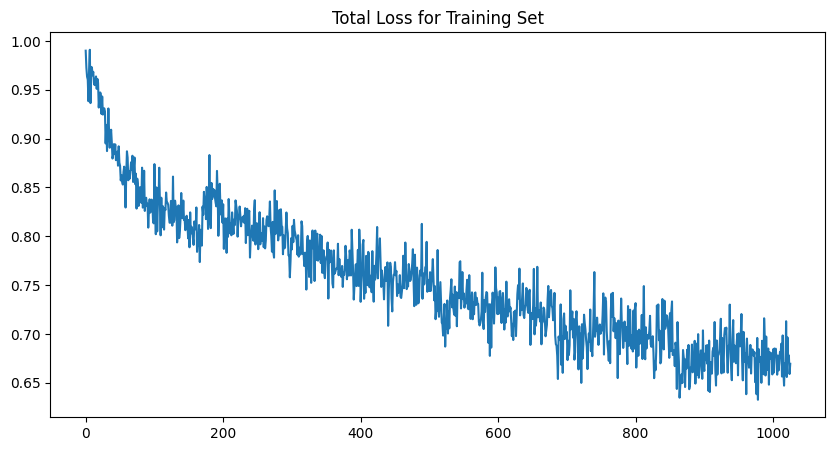

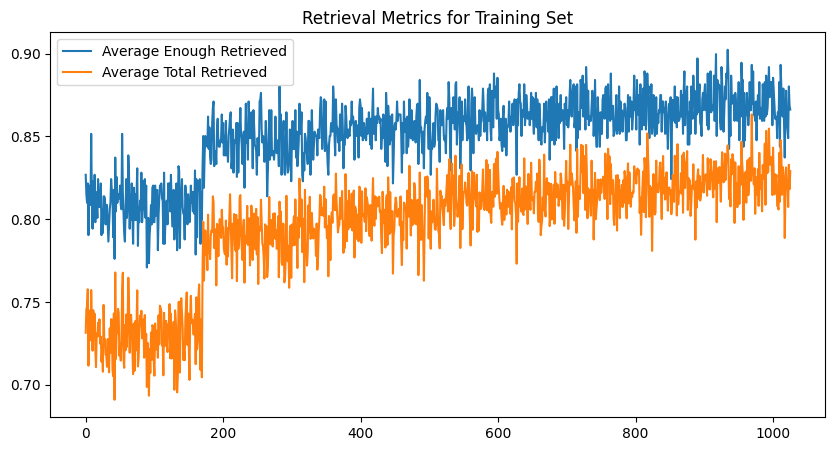

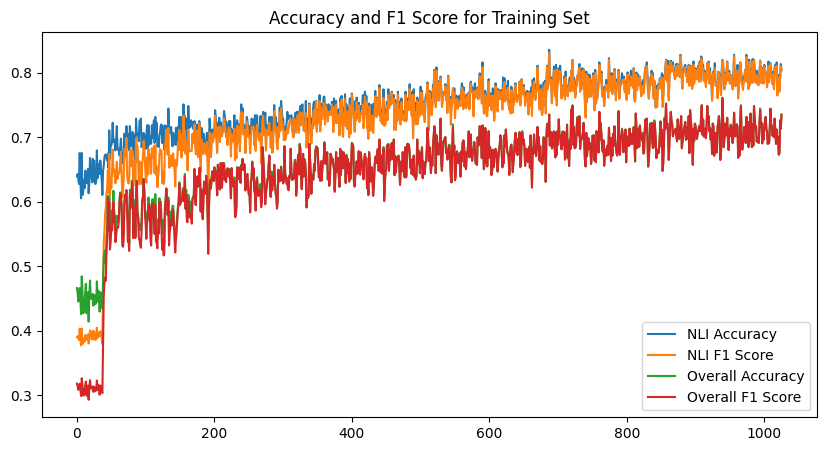

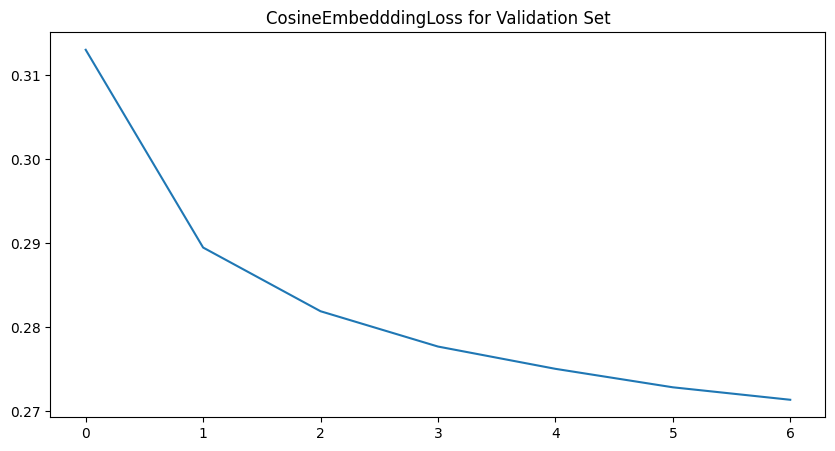

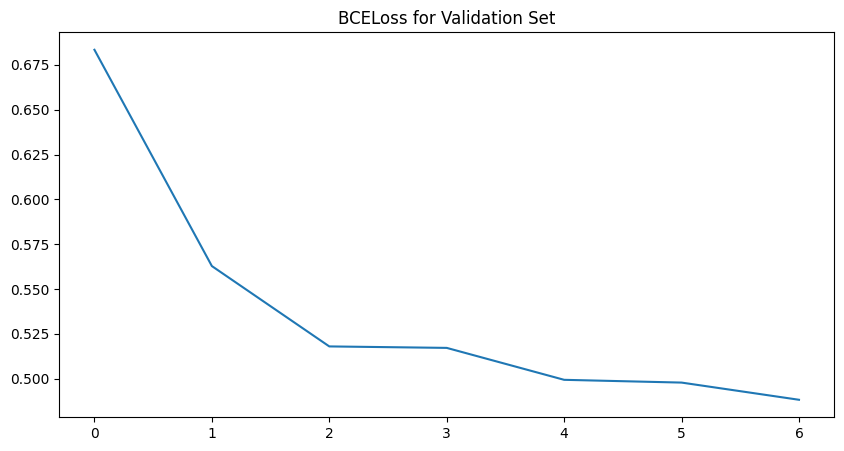

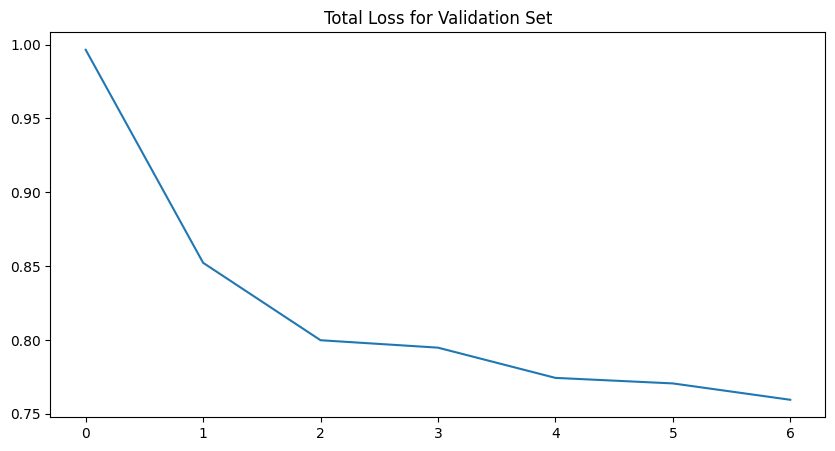

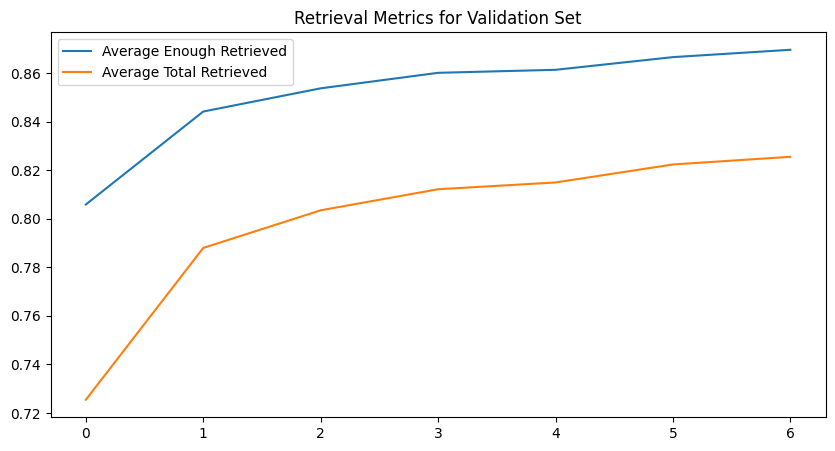

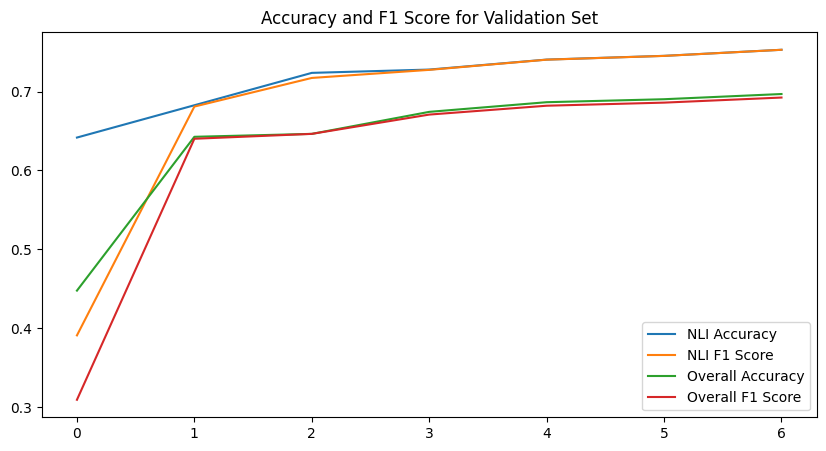

[0.4661458333333333, 0.4583333333333333, 0.4453125, 0.44921875, 0.4661458333333333, 0.44921875, 0.42578125, 0.484375, 0.4622395833333333, 0.4270833333333333, 0.4283854166666667, 0.4440104166666667, 0.4583333333333333, 0.47265625, 0.4270833333333333, 0.4479166666666667, 0.4596354166666667, 0.4140625, 0.4544270833333333, 0.4778645833333333, 0.453125, 0.44921875, 0.4518229166666667, 0.45703125, 0.4388020833333333, 0.4557291666666667, 0.4427083333333333, 0.44140625, 0.4440104166666667, 0.4765625, 0.4453125, 0.4622395833333333, 0.4557291666666667, 0.4296875, 0.4596354166666667, 0.4544270833333333, 0.4440104166666667, 0.4348958333333333, 0.4791666666666667, 0.51171875, 0.5208333333333334, 0.5247395833333334, 0.50390625, 0.5442708333333334, 0.5546875, 0.609375, 0.5638020833333334, 0.6080729166666666, 0.5442708333333334, 0.5572916666666666, 0.5859375, 0.5703125, 0.5885416666666666, 0.6171875, 0.5859375, 0.5794270833333334, 0.5494791666666666, 0.5598958333333334, 0.578125, 0.5768229166666666, 0

In [29]:
from other_utils import print_progress
import json

# load tracking_train and tracking_eval from metrics
with open("metrics/tracking_train_v1.json", "r") as f:
    tracking_train = json.load(f)

with open("metrics/tracking_eval_v1.json", "r") as f:
    tracking_eval = json.load(f)

# for tracking_train enough_retrieved and total_retrived, divide the series in 7 blocks of equal length
# and calculate their mean
l = int(len(tracking_train["average_enough_retrieved"])/6)

# tracking_train["average_enough_retrieved"] = [sum(tracking_train["average_enough_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["average_total_retrieved"] = [sum(tracking_train["average_total_retrieved"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_f1"] = [sum(tracking_train["overall_f1"][i*l:(i+1)*l])/l for i in range(0, 6)]
# tracking_train["overall_accuracy"] = [sum(tracking_train["overall_accuracy"][i*l:(i+1)*l])/l for i in range(0, 6)]

print_progress(epoch=0, batch=1, num_total_batches=1, tracking_train=tracking_train, tracking_eval=tracking_eval, ma_ratio=0.0)
print(tracking_train["overall_accuracy"])